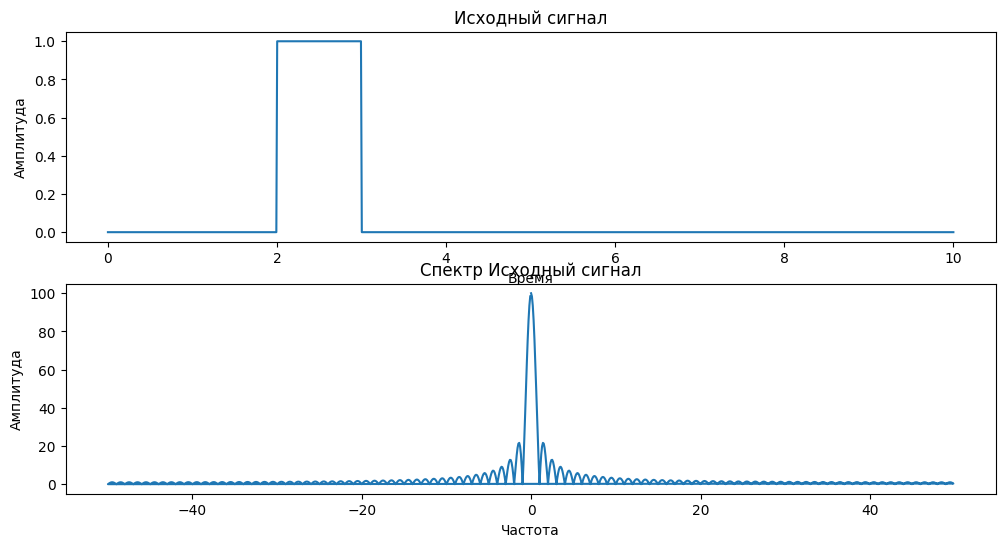

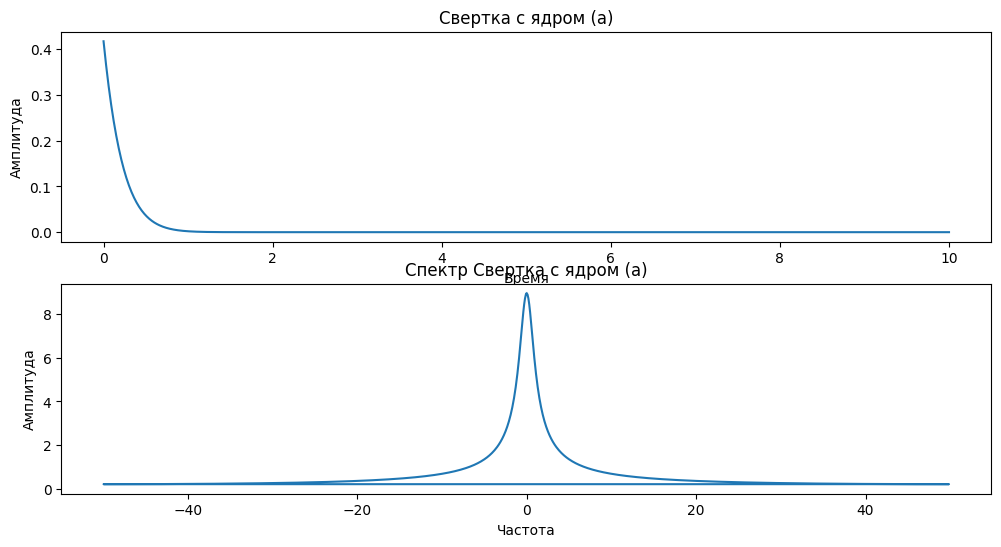

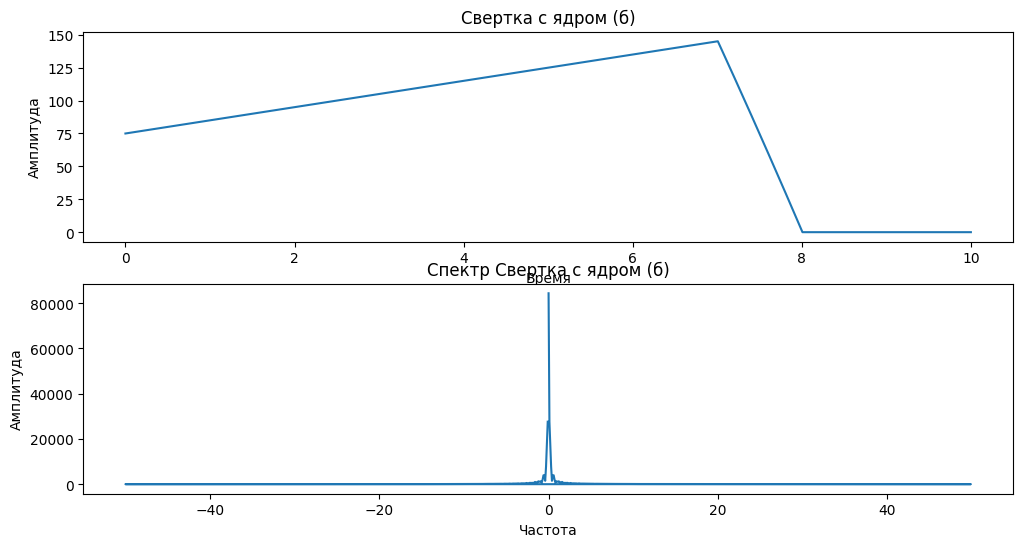

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Генерация сигнала
t = np.linspace(0, 10, 1000)
signal = np.zeros_like(t)
signal[np.logical_and(t >= 2, t <= 3)] = 1

# Ядро свертки (а)
A = 1
kernel_a = A * np.exp(-t**2)

# Ядро свертки (б)
kernel_b = 0.1 * t + 0.5

# Свертка
convolved_signal_a = np.convolve(signal, kernel_a, mode='same')
convolved_signal_b = np.convolve(signal, kernel_b, mode='same')

# Спектры
def plot_signal_and_spectrum(t, signal, title):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel('Время')
    plt.ylabel('Амплитуда')
    
    signal_fft = fft(signal)
    freq = fftfreq(len(signal), d=t[1] - t[0])
    plt.subplot(2, 1, 2)
    plt.plot(freq, np.abs(signal_fft))
    plt.title(f'Спектр {title}')
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда')
    
    plt.show()

plot_signal_and_spectrum(t, signal, 'Исходный сигнал')
plot_signal_and_spectrum(t, convolved_signal_a, 'Свертка с ядром (а)')
plot_signal_and_spectrum(t, convolved_signal_b, 'Свертка с ядром (б)')

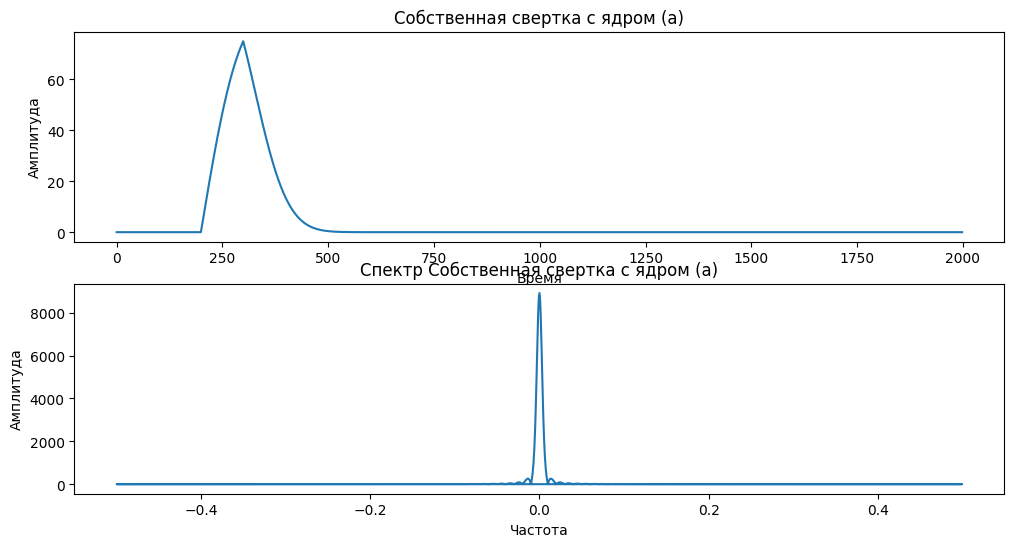

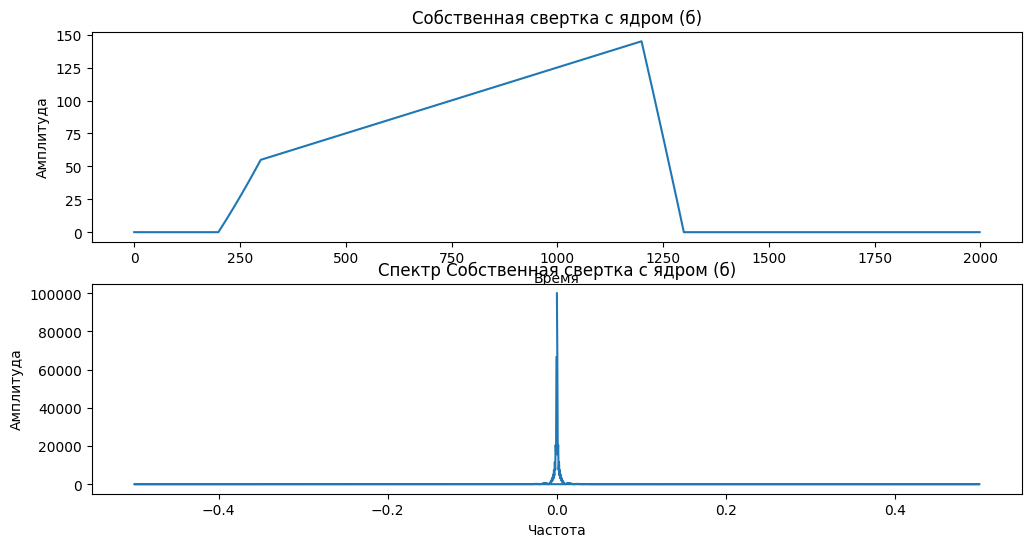

In [2]:
def custom_convolution(signal, kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    output_len = signal_len + kernel_len - 1
    output = np.zeros(output_len)
    
    for n in range(output_len):
        for k in range(kernel_len):
            if n - k >= 0 and n - k < signal_len:
                output[n] += signal[n - k] * kernel[k]
    
    return output

# Применение собственного алгоритма
custom_convolved_signal_a = custom_convolution(signal, kernel_a)
custom_convolved_signal_b = custom_convolution(signal, kernel_b)

# Графики
plot_signal_and_spectrum(np.arange(len(custom_convolved_signal_a)), custom_convolved_signal_a, 'Собственная свертка с ядром (а)')
plot_signal_and_spectrum(np.arange(len(custom_convolved_signal_b)), custom_convolved_signal_b, 'Собственная свертка с ядром (б)')

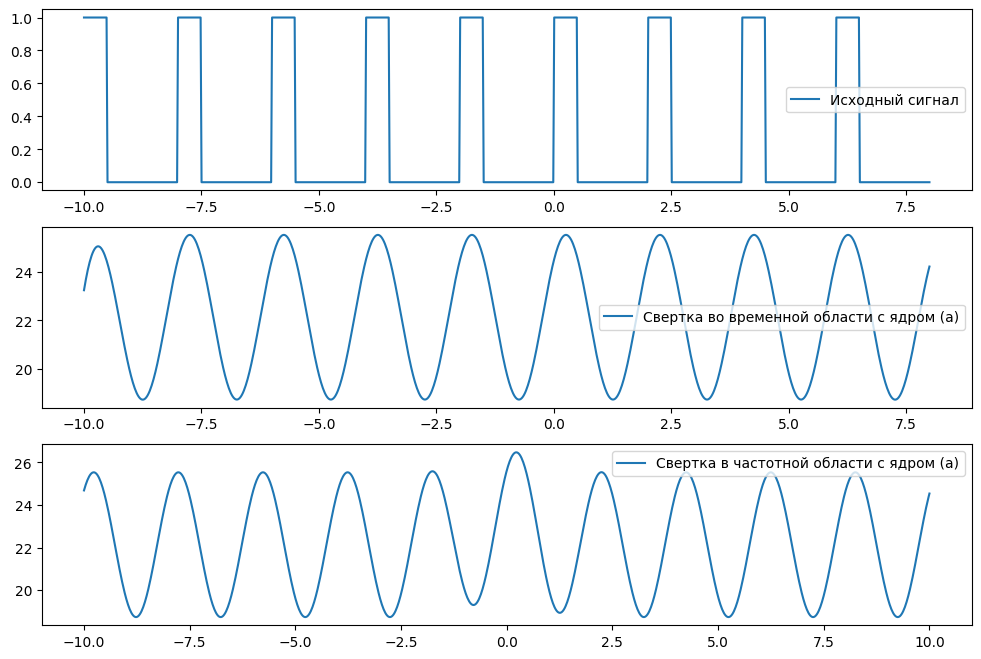

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация прямоугольных периодических импульсов
def generate_rectangular_pulses(t, period, width):
    return np.where(np.mod(t, period) < width, 1, 0)

# Ядро свертки (а) y = A * exp(-x^2)
def gaussian_kernel(x, A):
    return A * np.exp(-x**2)

# Временная ось
t = np.linspace(-10, 10, 1000)

# Генерация сигнала
signal = generate_rectangular_pulses(t, period=2, width=0.5)

# Ядро свертки (а)
A = 1
kernel_a = gaussian_kernel(t, A)

# Свертка сигнала с ядром (а) во временной области
convolved_signal_a_time = np.convolve(signal, kernel_a, mode='same')

# Преобразование Фурье сигнала и ядра
signal_fft = np.fft.fft(signal)
kernel_a_fft = np.fft.fft(kernel_a, len(signal))

# Умножение в частотной области
convolved_signal_a_fft = signal_fft * kernel_a_fft

# Обратное преобразование Фурье
convolved_signal_a_ifft = np.fft.ifft(convolved_signal_a_fft)

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t[:900], signal[:900], label='Исходный сигнал')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t[:900], convolved_signal_a_time[:900], label='Свертка во временной области с ядром (а)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, np.real(convolved_signal_a_ifft), label='Свертка в частотной области с ядром (а)')
plt.legend()

plt.show()

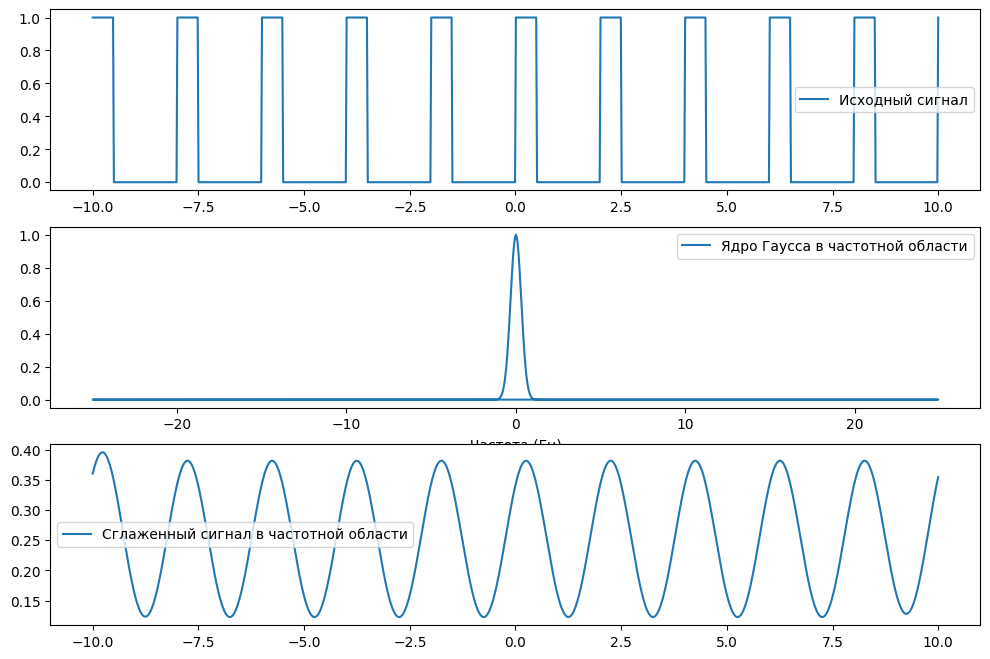

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация прямоугольных периодических импульсов
def generate_rectangular_pulses(t, period, width):
    return np.where(np.mod(t, period) < width, 1, 0)

# Временная ось
t = np.linspace(-10, 10, 1000)

# Генерация сигнала
signal = generate_rectangular_pulses(t, period=2, width=0.5)

# Частотная ось
frequencies = np.fft.fftfreq(len(t), d=t[1] - t[0])

# Параметры ядра Гаусса
p = 0  # Пиковая частота (центральная частота)
w = 1  # Ширина полосы на половине максимума (FWHM) в МГц

# Ядро Гаусса в частотной области
gaussian_kernel_freq = np.exp(-5 * (frequencies - p)**2 / w**2)

# Преобразование Фурье сигнала
signal_fft = np.fft.fft(signal)

# Умножение в частотной области
smoothed_signal_fft = signal_fft * gaussian_kernel_freq

# Обратное преобразование Фурье
smoothed_signal_ifft = np.fft.ifft(smoothed_signal_fft)

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(gaussian_kernel_freq), label='Ядро Гаусса в частотной области')
plt.xlabel('Частота (Гц)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, np.real(smoothed_signal_ifft), label='Сглаженный сигнал в частотной области')
plt.legend()

plt.show()

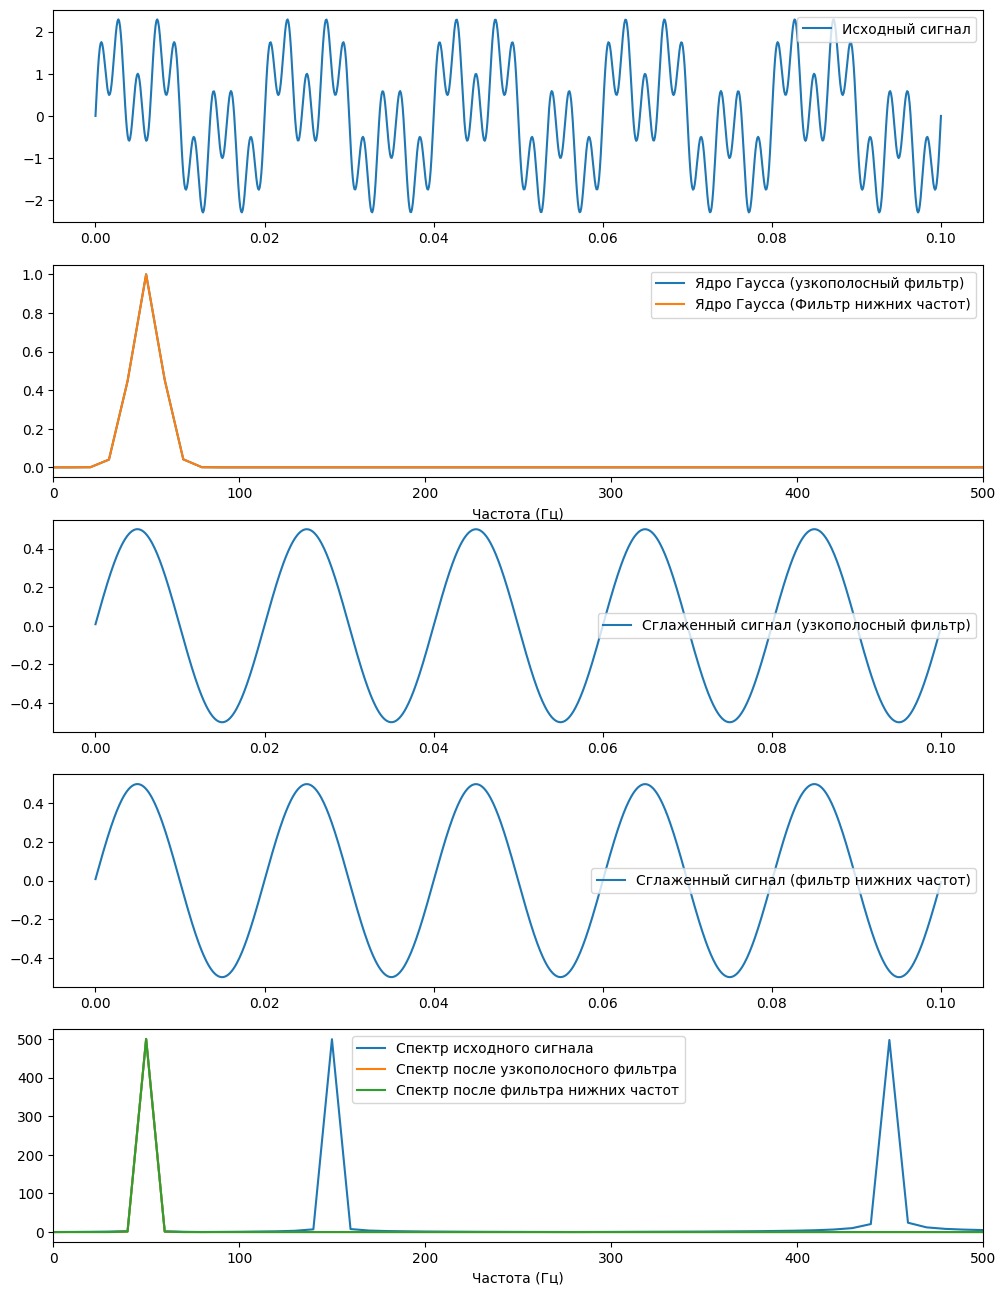

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация сигнала из трех синусоид с частотами 50 Гц, 150 Гц и 450 Гц
def generate_signal(t):
    return np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 150 * t) + np.sin(2 * np.pi * 450 * t)

# Временная ось
t = np.linspace(0, 0.1, 1000)  # 0.1 секунды для удобства визуализации

# Генерация сигнала
signal = generate_signal(t)

# Частотная ось
frequencies = np.fft.fftfreq(len(t), d=t[1] - t[0])
frequencies = np.fft.fftshift(frequencies)  # Сдвигаем частоты для удобства визуализации

# Параметры ядра Гаусса
p = 50  # Пиковая частота (центральная частота)
w_narrowband = 25  # Ширина полосы на половине максимума (FWHM) для узкополосного фильтра
w_lowpass = 25  # Ширина полосы на половине максимума (FWHM) для фильтра нижних частот

# Ядро Гаусса в частотной области для узкополосного фильтра
gaussian_kernel_freq_narrowband = np.exp(-5 * (frequencies - p)**2 / w_narrowband**2)

# Ядро Гаусса в частотной области для фильтра нижних частот
gaussian_kernel_freq_lowpass = np.exp(-5 * (frequencies - p)**2 / w_lowpass**2)

# Преобразование Фурье сигнала
signal_fft = np.fft.fft(signal)
signal_fft = np.fft.fftshift(signal_fft)  # Сдвигаем спектр для удобства визуализации

# Умножение в частотной области для узкополосного фильтра
smoothed_signal_fft_narrowband = signal_fft * gaussian_kernel_freq_narrowband

# Умножение в частотной области для фильтра нижних частот
smoothed_signal_fft_lowpass = signal_fft * gaussian_kernel_freq_lowpass

# Обратное преобразование Фурье для узкополосного фильтра
smoothed_signal_ifft_narrowband = np.fft.ifft(np.fft.ifftshift(smoothed_signal_fft_narrowband))

# Обратное преобразование Фурье для фильтра нижних частот
smoothed_signal_ifft_lowpass = np.fft.ifft(np.fft.ifftshift(smoothed_signal_fft_lowpass))

# Визуализация
plt.figure(figsize=(12, 16))

plt.subplot(5, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(frequencies, np.abs(gaussian_kernel_freq_narrowband), label='Ядро Гаусса (узкополосный фильтр)')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.legend()

plt.plot(frequencies, np.abs(gaussian_kernel_freq_lowpass), label='Ядро Гаусса (Фильтр нижних частот)')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, np.real(smoothed_signal_ifft_narrowband), label='Сглаженный сигнал (узкополосный фильтр)')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, np.real(smoothed_signal_ifft_lowpass), label='Сглаженный сигнал (фильтр нижних частот)')
plt.legend()

# График распределения частот до и после фильтрации
plt.subplot(5, 1, 5)
plt.plot(frequencies, np.abs(signal_fft), label='Спектр исходного сигнала')
plt.plot(frequencies, np.abs(smoothed_signal_fft_narrowband), label='Спектр после узкополосного фильтра')
plt.plot(frequencies, np.abs(smoothed_signal_fft_lowpass), label='Спектр после фильтра нижних частот')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.legend()

plt.show()

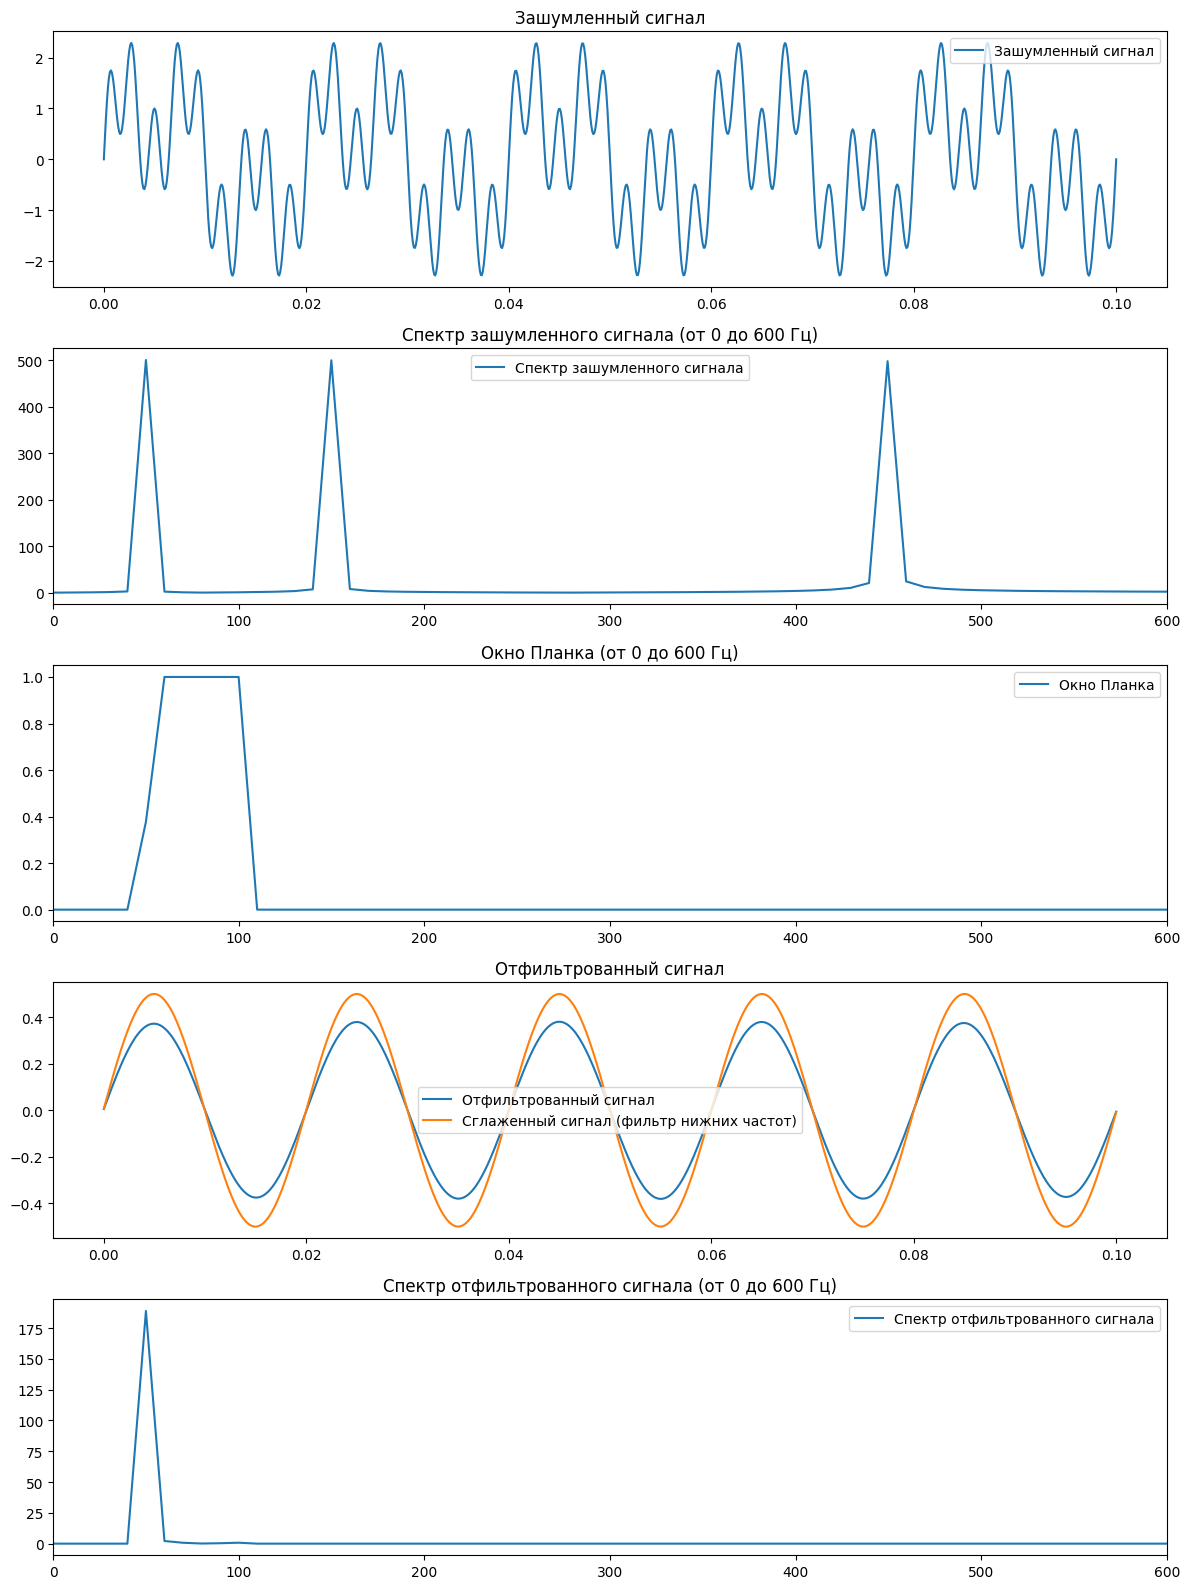

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Функция для генерации сигнала
def generate_signal(t):
    return np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 150 * t) + np.sin(2 * np.pi * 450 * t)

# Генерация сигнала
t = np.linspace(0, 0.1, 1000)
signal = generate_signal(t)

# Зашумленный сигнал
noise = np.random.normal(0, 0.5, len(signal))
noisy_signal = signal

# Вычисление спектра сигнала
signal_fft = fft(noisy_signal)
freq = fftfreq(len(t), d=t[1] - t[0])

# Определение диапазона частот для полосового фильтра
low_cutoff = 0  # Нижняя граница частоты
high_cutoff = 100  # Верхняя граница частоты

# Создание окна Планка в частотной области
alpha = 10  # Параметр для окна Планка
window_planck = np.zeros_like(freq)
window_planck[np.logical_and(freq > low_cutoff, freq < high_cutoff)] = 1 / (1 + np.exp(-alpha * (freq[np.logical_and(freq > low_cutoff, freq < high_cutoff)] - (low_cutoff + high_cutoff) / 2)))
window_planck[np.logical_and(freq < -low_cutoff, freq > -high_cutoff)] = 1 / (1 + np.exp(-alpha * (-freq[np.logical_and(freq < -low_cutoff, freq > -high_cutoff)] - (low_cutoff + high_cutoff) / 2)))

# Применение окна Планка к спектру сигнала
filtered_signal_fft = signal_fft * window_planck

# Обратное преобразование Фурье
filtered_signal = ifft(filtered_signal_fft)

# Визуализация
plt.figure(figsize=(12, 16))

# Исходный зашумленный сигнал
plt.subplot(5, 1, 1)
plt.plot(t, noisy_signal, label='Зашумленный сигнал')
plt.title('Зашумленный сигнал')
plt.legend()

# Спектр зашумленного сигнала (от 0 до 600 Гц)
plt.subplot(5, 1, 2)
positive_freq = freq[freq >= 0]
positive_signal_fft = signal_fft[freq >= 0]
plt.plot(positive_freq, np.abs(positive_signal_fft), label='Спектр зашумленного сигнала')
plt.title('Спектр зашумленного сигнала (от 0 до 600 Гц)')
plt.xlim(0, 600)
plt.legend()

# Окно Планка (от 0 до 600 Гц)
plt.subplot(5, 1, 3)
positive_window_planck = window_planck[freq >= 0]
plt.plot(positive_freq, positive_window_planck, label='Окно Планка')
plt.title('Окно Планка (от 0 до 600 Гц)')
plt.xlim(0, 600)
plt.legend()

# Отфильтрованный сигнал
plt.subplot(5, 1, 4)
plt.plot(t, np.real(filtered_signal), label='Отфильтрованный сигнал')
plt.plot(t, np.real(smoothed_signal_ifft_lowpass), label='Сглаженный сигнал (фильтр нижних частот)')
plt.title('Отфильтрованный сигнал')
plt.legend()

# Спектр отфильтрованного сигнала (от 0 до 600 Гц)
plt.subplot(5, 1, 5)
positive_filtered_signal_fft = filtered_signal_fft[freq >= 0]
plt.plot(positive_freq, np.abs(positive_filtered_signal_fft), label='Спектр отфильтрованного сигнала')
plt.title('Спектр отфильтрованного сигнала (от 0 до 600 Гц)')
plt.xlim(0, 600)
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'kernel_gauss' is not defined